<a href="https://colab.research.google.com/github/Syc056/Deep-Learning-with-Python/blob/main/DeepLearningWithPython3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 뉴스 기사 분류 : 다중 분류 문제
# 클래스의 결과가 2개 이상일 경우

from keras.datasets import reuters

(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
# 로이터 데이터셋을 텍스트로 디코딩하기

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [8]:
# 데이터 인코딩하기

import numpy as np

def vectorize_sequences(sequences ,dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i ,sequence in enumerate(sequences):
    results[i,sequence] =  1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels), dimension))
  for i ,label in enumerate(labels):
    results[i,label] =  1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
# ===

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
# 모델 구성

from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

# 모델 컴파일

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    validation_data=(x_val, y_val))

Epoch 1/20
250/250 [==============================] - 3s 10ms/step - loss: 1.4572 - accuracy: 0.6844 - val_loss: 1.0857 - val_accuracy: 0.7470
Epoch 2/20
250/250 [==============================] - 2s 8ms/step - loss: 0.7611 - accuracy: 0.8289 - val_loss: 0.8965 - val_accuracy: 0.8130
Epoch 3/20
250/250 [==============================] - 2s 9ms/step - loss: 0.4768 - accuracy: 0.8958 - val_loss: 0.8742 - val_accuracy: 0.8260
Epoch 4/20
250/250 [==============================] - 2s 9ms/step - loss: 0.3301 - accuracy: 0.9266 - val_loss: 0.9581 - val_accuracy: 0.8230
Epoch 5/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2565 - accuracy: 0.9430 - val_loss: 1.0224 - val_accuracy: 0.8200
Epoch 6/20
250/250 [==============================] - 2s 9ms/step - loss: 0.2173 - accuracy: 0.9489 - val_loss: 1.0475 - val_accuracy: 0.8180
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 0.1921 - accuracy: 0.9531 - val_loss: 1.1387 - val_accuracy: 0.8080
Epoch

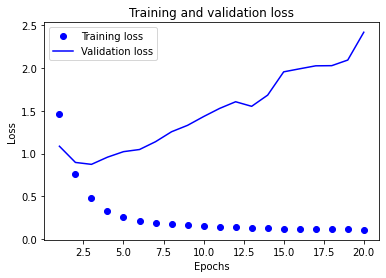

In [18]:
# 훈련과 검증 손실 그리기

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

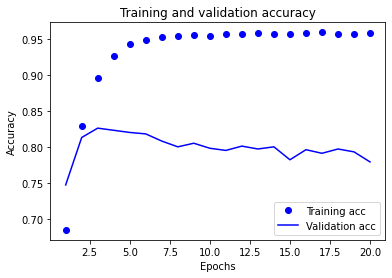

In [19]:
# 훈련과 검증 정확도 그리기

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
# 위의 그래프에서 보면 epochs 수가 늘어갈수록 accuracy가 낮아 지는것을 볼 수 있다.
# 이를 통해서 적절한 epochs 수를 알아 낼 수 있으며, 이를 통해 얻어낸 epochs 수 대로 다시 훈련시킨다.

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 49ms/step - loss: 0.4828 - accuracy: 0.0129
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 0.1662 - accuracy: 0.1929
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 0.0917 - accuracy: 0.5277
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.0633 - accuracy: 0.6488
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.0489 - accuracy: 0.6912
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.0401 - accuracy: 0.7321
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.0337 - accuracy: 0.7769
Epoch 8/9
16/16 [==============================] - 1s 46ms/step - loss: 0.0288 - accuracy: 0.8122
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.7569


In [22]:
results

[0.036128852516412735, 0.7569011449813843]

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

0.44536442

In [26]:
np.argmax(predictions[0])

3

In [27]:
# 레이블을 인코딩하는 방법은 범주형 인코딩(one hot encoding)과 정수 텐서로 변환하는것이 있습니다.

# ex) 
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

# 이 경우에 손실 함수를 바꾸어 주어야 하는데 범주형의 경우 categorical_crossentropy, 
# 정수 텐서의 경우 sparse_categorical_crossentropy 를 사용하면 됩니다.

# ex)
# model.compile(optimizer='rmsprop',
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

In [30]:
# 중간층이 마지막 출력보다 작으면 안되는 이유

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

# 기존과 결과치 비교시 성능이  95.8% -> 88.21%로 7% 이상 감소되었음을 볼 수 있다.
# 그 이유는 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문에 압축과정에서 손실이 잃어난 것이다.

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.6281 - accuracy: 0.4842 - val_loss: 1.8660 - val_accuracy: 0.5980
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.6006 - accuracy: 0.6175 - val_loss: 1.5282 - val_accuracy: 0.6230
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3185 - accuracy: 0.6542 - val_loss: 1.3785 - val_accuracy: 0.6600
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1535 - accuracy: 0.7144 - val_loss: 1.3051 - val_accuracy: 0.7020
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0316 - accuracy: 0.7425 - val_loss: 1.2736 - val_accuracy: 0.7010
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9337 - accuracy: 0.7612 - val_loss: 1.2642 - val_accuracy: 0.7060
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.8539 - accuracy: 0.7825 - val_loss: 1.2847 - val_accuracy: 0.7010
Epoch 8/20
63